In [1]:
# Import image processing libraries
from scipy import ndimage

import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
def save_image(img, name):
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    cv2.imwrite(name, norm_image)

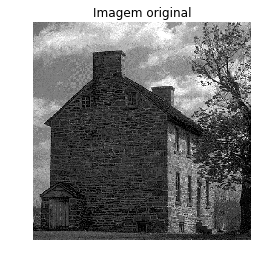

In [3]:
# Load some images (all the examples will use this image)
img = cv2.imread("house.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = img / 255

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

# 1.1 Filtragem em domínio espacial

1.0


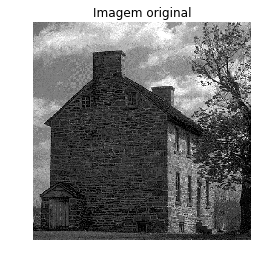

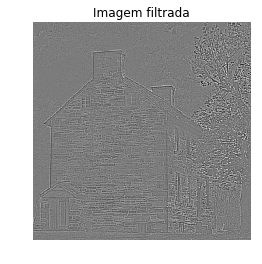

In [4]:
# Exercise 1.1 a)

h1 = np.array([
    [-1, -1, -1, -1, -1],
    [-1,  1,  2,  1, -1],
    [-1,  2,  4,  2, -1],
    [-1,  1,  2,  1, -1],
    [-1, -1, -1, -1, -1]
])

new_image = ndimage.correlate(img, h1)
new_image = new_image / new_image.max()
print(new_image.max())

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio1a.png')

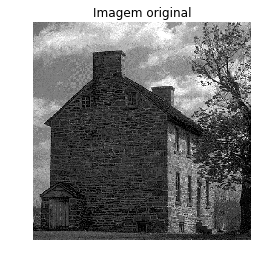

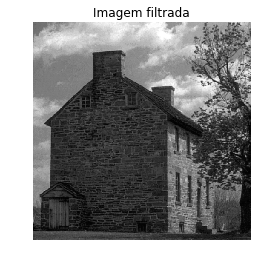

In [5]:
# Exercise 1.1 b)
h2 = np.array([1,4,6,4,1])
h2 = h2 / h2.sum()

new_image = ndimage.correlate(img, h2.reshape(1,-1)) + ndimage.correlate(img, h2.reshape(-1,1))

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio1b.png')

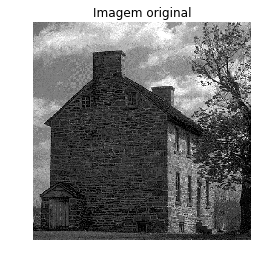

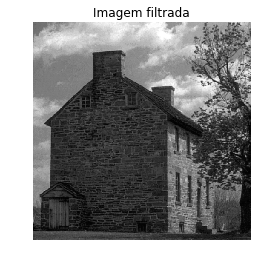

In [6]:
# Exercise 1.1 c)

h3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0 ,1]
])

new_image_vertical = ndimage.correlate(img, h3)

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.show()

save_image(new_image_vertical, 'results/exercicio1c1.png')

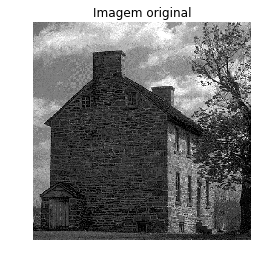

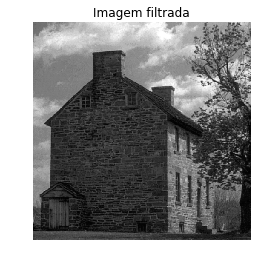

In [7]:
h4 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]]
)

new_image_horizontal = ndimage.correlate(img, h4)

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.show()

save_image(new_image_horizontal, 'results/exercicio1c2.png')

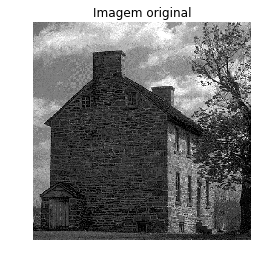

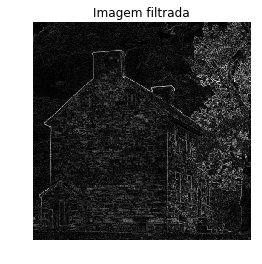

In [8]:
new_image = np.sqrt((new_image_vertical**2 + new_image_horizontal**2))

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off'), 
plt.show()

save_image(new_image, 'results/exercicio1c.png')

# 1.2 Filtragem em dominio de frequencia

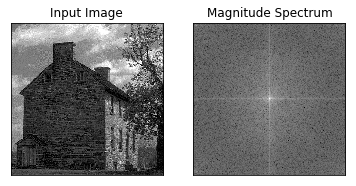

In [9]:
fft_image = np.fft.fft2(img)
shift_image = np.fft.fftshift(fft_image)
magnitude_spectrum = np.log(np.abs(shift_image))


plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

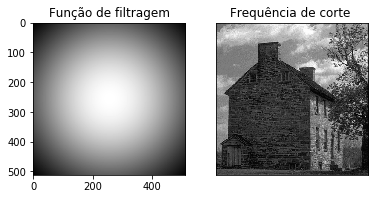

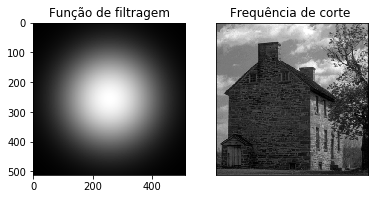

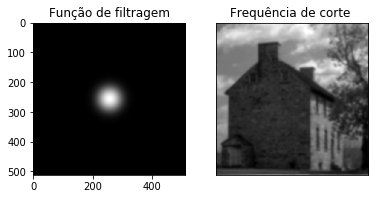

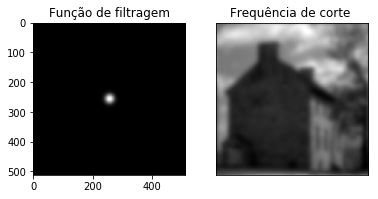

In [10]:
def gaussian_low_pass_mask(shape, cut):
    indices = np.indices(shape)
    rows, cols = shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    distances = np.sqrt(indices[0] ** 2 + indices[1] ** 2)
    mask = np.exp(-(distances ** 2) / (2 * cut ** 2))
    return mask


for i in [200,100,25,10]:
    shift_image = np.fft.fftshift(fft_image)
    mask = gaussian_low_pass_mask(shift_image.shape, i)
    shift_image = shift_image * mask
    
    function_mask = np.log(np.abs(mask) + 1)
    plt.subplot(121), plt.imshow(function_mask, cmap = 'gray')
    plt.title('Função de filtragem')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Frequência de corte '), plt.xticks([]), plt.yticks([])
    plt.show()
    
    save_image(function_mask, 'results/exercicio2passa_baixa{}.png'.format(i))
    save_image(new_image, 'results/exercicio2passa_baixa{}img.png'.format(i))

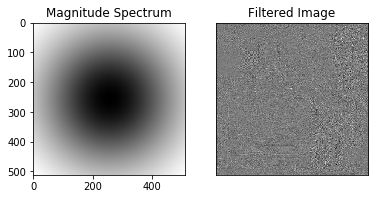

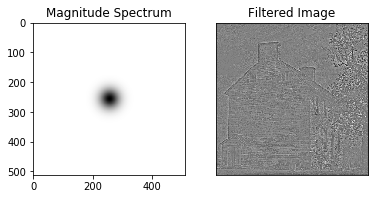

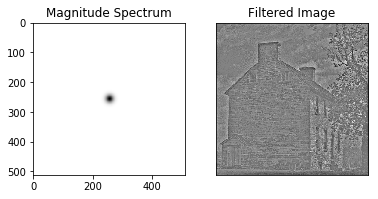

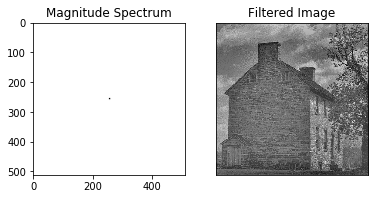

In [11]:
def gaussian_high_pass_mask(shape, cut):
    indices = np.indices(shape)
    rows, cols = shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    distances = np.sqrt(indices[0] ** 2 + indices[1] ** 2)
    mask = 1 - np.exp(-(distances ** 2) / (2 * cut ** 2))
    return mask


for i in [200,25,10,2]:
    shift_image = np.fft.fftshift(fft_image)
    mask = gaussian_high_pass_mask(shift_image.shape, i)
    shift_image = shift_image * mask
    
    function_mask = np.log(np.abs(mask) + 1)
    plt.subplot(121), plt.imshow(function_mask, cmap = 'gray')
    plt.title('Magnitude Spectrum')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    
    save_image(function_mask, 'results/exercicio2passa_alta{}.png'.format(i))
    save_image(new_image, 'results/exercicio2passa_alta{}img.png'.format(i))

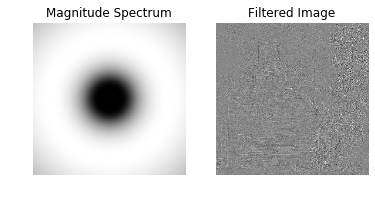

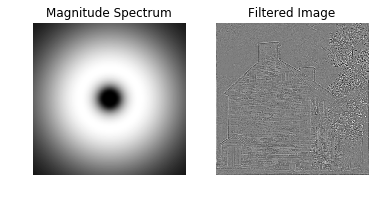

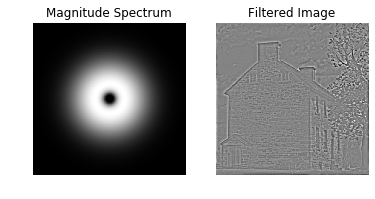

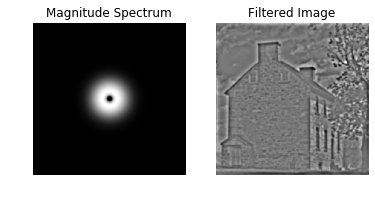

In [12]:
def gaussian_band_pass_mask(shape, cut, width):
    indices = np.indices(shape)
    rows, cols = shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    distances = np.sqrt(indices[0] ** 2 + indices[1] ** 2)
    mask = np.exp(-(((distances ** 2 - cut ** 2) / (width * distances)) ** 2))
    return mask

for i in [200,100,50,25]:
    shift_image = np.fft.fftshift(fft_image)
    mask = gaussian_band_pass_mask(shift_image.shape, i, i * 2)
    shift_image = shift_image * mask
    
    function_mask = np.log(np.abs(mask) + 1)
    plt.subplot(121), plt.imshow(function_mask, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.axis('off')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.axis('off')
    plt.show()
    
    save_image(function_mask * 255, 'results/exercicio2passa_faixa{}.png'.format(i))
    save_image(new_image, 'results/exercicio2passa_faixa{}img.png'.format(i))

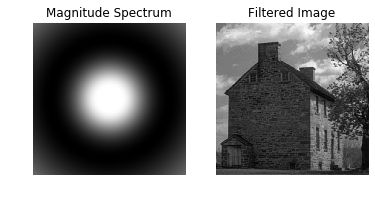

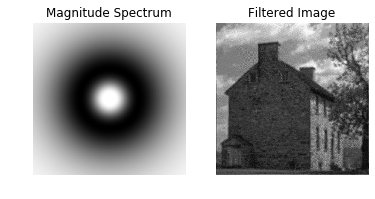

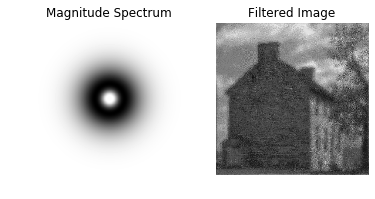

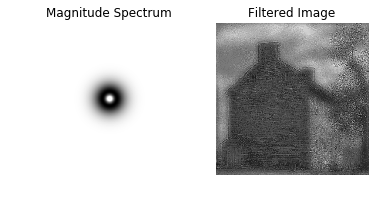

In [13]:
def gaussian_band_reject_mask(shape, cut, width):
    indices = np.indices(shape)
    rows, cols = shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    distances = np.sqrt(indices[0] ** 2 + indices[1] ** 2) + 0.1
    mask = 1 - np.exp(-(((distances ** 2 - cut ** 2) / (width * distances)) ** 2))
    return mask

for i in [200,100,50,25]:
    shift_image = np.fft.fftshift(fft_image)
    mask = gaussian_band_reject_mask(shift_image.shape, i, i * 2)
    shift_image = shift_image * mask
    
    function_mask = np.log(np.abs(mask) + 1)
    plt.subplot(121), plt.imshow(function_mask, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.axis('off')
    
    shift_image = np.fft.ifftshift(shift_image)
    new_image = np.fft.ifft2(shift_image).real
    
    plt.subplot(122), plt.imshow(new_image, cmap = 'gray')
    plt.title('Filtered Image'), plt.axis('off')
    plt.show()
    
    save_image(function_mask, 'results/exercicio2rejeita_faixa{}.png'.format(i))
    save_image(new_image, 'results/exercicio2rejeita_faixa{}img.png'.format(i))